<a href="https://colab.research.google.com/github/maxhart5000/ML-Thompson-Sampling/blob/main/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [ ]:
import random

N = 10000
d = 10

ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):

  ad = 0
  max_random = 0

  for i in range(0, d):

    random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)

    if random_beta > max_random:
      max_random = random_beta
      ad = i

  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  total_reward += reward

  if reward == 0:
    numbers_of_rewards_0[ad] += 1
  else:
    numbers_of_rewards_1[ad] += 1

In [ ]:
print(total_reward)

2600


## Visualising the results - Histogram

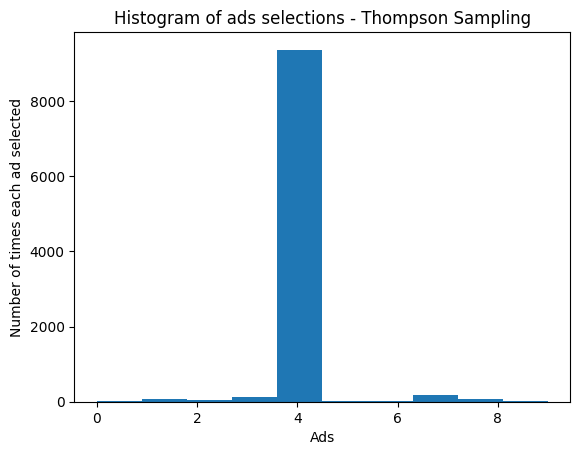

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections - Thompson Sampling')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad selected')
plt.show()